# IIC-3641 GML UC

- Versiones de librerías, python 3.8.19
- networkx 2.8.8

## Veamos las versiones de librerías que estamos usando

In [1]:
import sys
print(sys.version)
print(sys.version_info)

3.8.19 (default, Apr  6 2024, 17:58:10) 
[GCC 11.4.0]
sys.version_info(major=3, minor=8, micro=19, releaselevel='final', serial=0)


In [2]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

print("NetworkX:", nx.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Numpy:", np.__version__)

NetworkX: 2.8.8
Matplotlib: 3.6.2
Numpy: 1.23.5


## Vamos a crear una red usando el modelo Barabási-Albert

In [3]:
N = 10000
m = 3 # número de enlaces que cada nodo creará al añadirse a la red

G = nx.barabasi_albert_graph(N, m, seed=None, initial_graph=None)
node_degrees = dict(G.degree())
degrees = np.array(list(node_degrees.values()))
min_degree = degrees.min()
max_degree = degrees.max()

normalized_degrees = (degrees - min_degree) / (max_degree - min_degree)


/home/marcelo/.local/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/tmp/ipykernel_585007/3919001524.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")


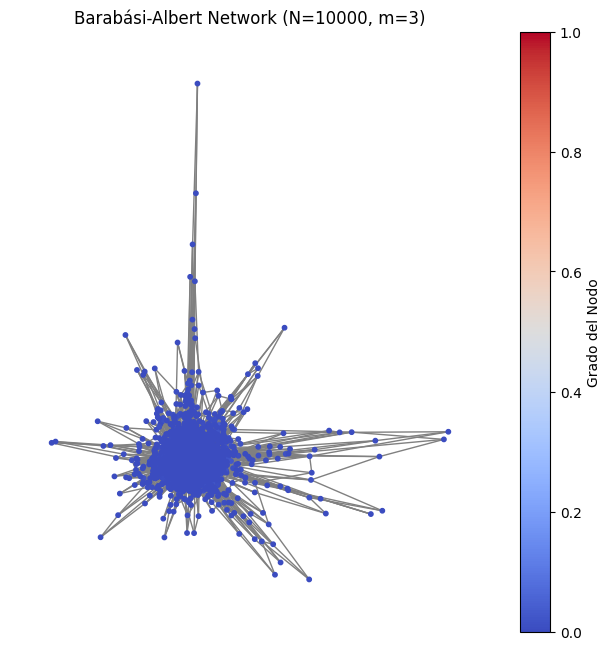

In [4]:
colors = plt.cm.coolwarm(normalized_degrees)

pos = nx.spectral_layout(G, weight=None, scale=3.0)  # Posiciones de los nodos


plt.figure(figsize=(6, 6))
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=10, cmap=plt.cm.coolwarm, edge_color='gray')
plt.title("Barabási-Albert Network (N=10000, m=3)")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")
plt.show()

## Obtenemos la distribución de grado

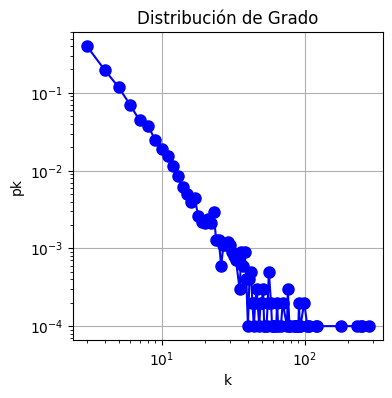

In [5]:
degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

sorted_degrees = sorted(degree_counts.items())

x, y = zip(*sorted_degrees)
p = [n / N for n in y]


plt.figure(figsize=(4, 4))
plt.plot(x, p, 'bo-', markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de Grado')
plt.xlabel('k')
plt.ylabel('pk')

plt.grid(True)
plt.show()

# Ajustamos una power law

In [6]:
from scipy import stats

log_k = np.log(range(1, len(x) + 1))
log_pk = np.log(p)

slope, intercept, r_value, p_value, std_err = stats.linregress(log_k, log_pk)

gamma = -slope
print(f'El exponente de la ley de potencias (γ) es aproximadamente: {gamma:.4f}')


El exponente de la ley de potencias (γ) es aproximadamente: 2.2180


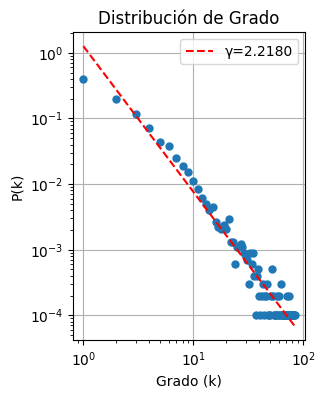

In [7]:
# Graficar la distribución de grado en una escala log-log
plt.figure(figsize=(3, 4))
plt.loglog(range(1, len(x) + 1), p, 'o', markersize=5)
plt.xlabel('Grado (k)')
plt.ylabel('P(k)')
plt.title('Distribución de Grado')

# Graficar la línea ajustada
plt.plot(np.exp(log_k), np.exp(intercept + slope * log_k), color='red', linestyle='--', label='γ=2.2180')
plt.legend()
plt.grid(True)
plt.show()

## Podemos calcular el coeficiente de determinación

In [8]:
# Coeficiente de determinación (R²), si es cercano a 1 tenemos un buen ajuste
r_squared = r_value**2
print(f"R²: {r_squared}")

R²: 0.9506284813600199


## Observe que el grado promedio es ~ 2m ¿Por qué?

In [9]:
sum(degrees)/N

5.9982

## Veamos el model LFR

In [11]:
N = 10000                 # número de nodos
tau1 = 2.5              # γ
tau2 = 1.5              # beta
mu = 0.8                # mixing parameter: fracción de aristas fuera de la comunidad
average_degree = 6
seed = 42

# Crear red LFR
G = nx.generators.community.LFR_benchmark_graph(
    N, tau1, tau2, mu,
    average_degree=average_degree,
    seed=seed
)


In [12]:
node_degrees = dict(G.degree())
degrees = np.array(list(node_degrees.values()))
min_degree = degrees.min()
max_degree = degrees.max()

normalized_degrees = (degrees - min_degree) / (max_degree - min_degree)

/home/marcelo/.local/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/tmp/ipykernel_585007/956518963.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")


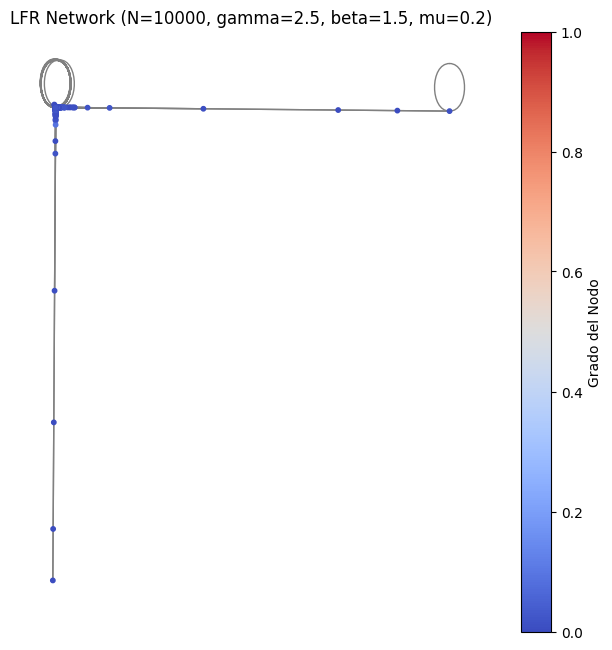

In [13]:
colors = plt.cm.coolwarm(normalized_degrees)

pos = nx.spectral_layout(G, weight=None, scale=3.0)  # Posiciones de los nodos


plt.figure(figsize=(6, 6))
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=10, cmap=plt.cm.coolwarm, edge_color='gray')
plt.title("LFR Network (N=10000, gamma=2.5, beta=1.5, mu=0.2)")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")
plt.show()

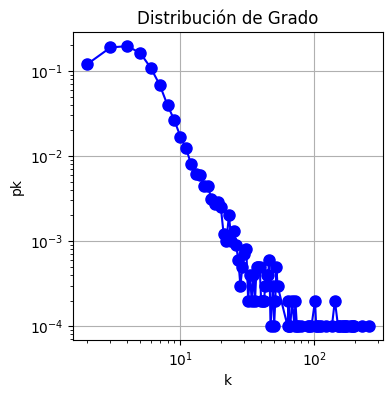

In [14]:
degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

sorted_degrees = sorted(degree_counts.items())

x, y = zip(*sorted_degrees)
p = [n / N for n in y]


plt.figure(figsize=(4, 4))
plt.plot(x, p, 'bo-', markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de Grado')
plt.xlabel('k')
plt.ylabel('pk')

plt.grid(True)
plt.show()

In [15]:
log_k = np.log(range(1, len(x) + 1))
log_pk = np.log(p)

slope, intercept, r_value, p_value, std_err = stats.linregress(log_k, log_pk)

gamma = -slope
print(f'El exponente de la ley de potencias (γ) es aproximadamente: {gamma:.4f}')

El exponente de la ley de potencias (γ) es aproximadamente: 2.2401


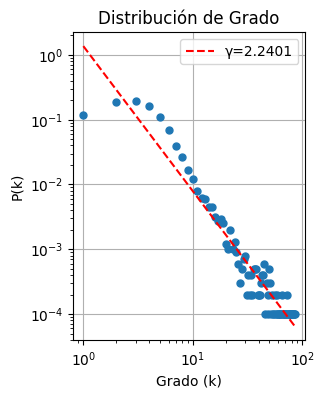

In [16]:
# Graficar la distribución de grado en una escala log-log
plt.figure(figsize=(3, 4))
plt.loglog(range(1, len(x) + 1), p, 'o', markersize=5)
plt.xlabel('Grado (k)')
plt.ylabel('P(k)')
plt.title('Distribución de Grado')

# Graficar la línea ajustada
plt.plot(np.exp(log_k), np.exp(intercept + slope * log_k), color='red', linestyle='--', label='γ=2.2401')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Coeficiente de determinación (R²), si es cercano a 1 tenemos un buen ajuste
r_squared = r_value**2
print(f"R²: {r_squared}")

R²: 0.9337683366802888


In [18]:
sum(degrees)/N

6.008

In [19]:
# Las comunidades vienen en el atributo "community" de cada nodo
communities = {frozenset(G.nodes[v]['community']) for v in G}

print(f"Número de comunidades: {len(communities)}")

Número de comunidades: 523


Text(0.5, 1.0, 'Histograma de tamaños de comunidades (LFR)')

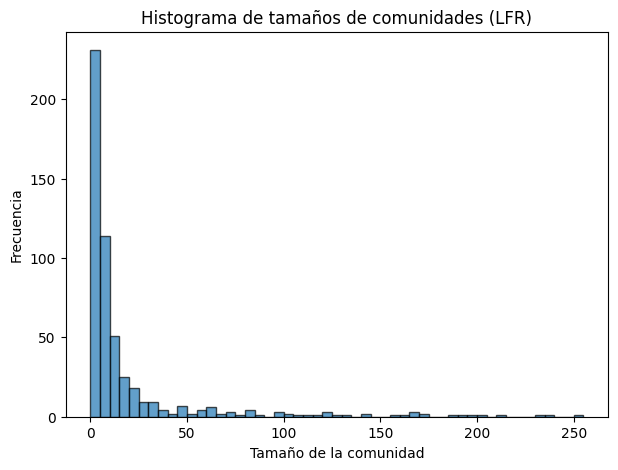

In [20]:
community_sizes = [len(c) for c in communities]

# Histograma de tamaños de comunidad
plt.figure(figsize=(7,5))
plt.hist(community_sizes, bins=range(0, max(community_sizes)+5, 5), edgecolor='black', alpha=0.7)
plt.xlabel("Tamaño de la comunidad")
plt.ylabel("Frecuencia")
plt.title("Histograma de tamaños de comunidades (LFR)")

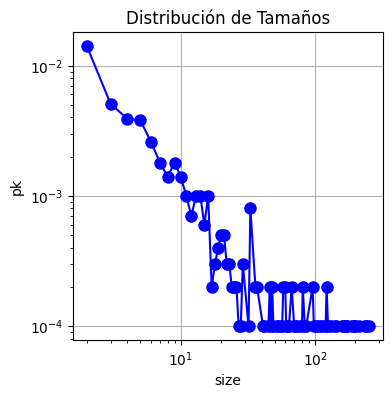

In [22]:
size_counts = {}
for size in community_sizes:
    if size in size_counts:
        size_counts[size] += 1
    else:
        size_counts[size] = 1

sorted_sizes = sorted(size_counts.items())

x, y = zip(*sorted_sizes)
p = [n / N for n in y]


plt.figure(figsize=(4, 4))
plt.plot(x, p, 'bo-', markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de Tamaños')
plt.xlabel('size')
plt.ylabel('pk')

plt.grid(True)
plt.show()

In [23]:
log_k = np.log(range(1, len(x) + 1))
log_pk = np.log(p)

slope, intercept, r_value, p_value, std_err = stats.linregress(log_k, log_pk)

beta = -slope
print(f'El exponente de la ley de tamaños (β) es aproximadamente: {beta:.4f}')

El exponente de la ley de tamaños (β) es aproximadamente: 1.1591


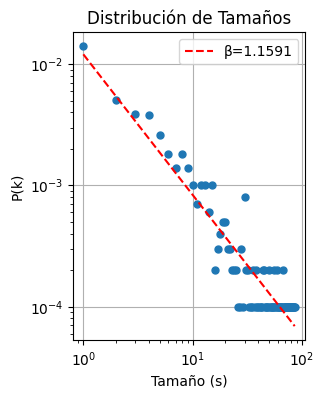

In [24]:
# Graficar la distribución de tamaños en una escala log-log
plt.figure(figsize=(3, 4))
plt.loglog(range(1, len(x) + 1), p, 'o', markersize=5)
plt.xlabel('Tamaño (s)')
plt.ylabel('P(k)')
plt.title('Distribución de Tamaños')

# Graficar la línea ajustada
plt.plot(np.exp(log_k), np.exp(intercept + slope * log_k), color='red', linestyle='--', label='β=1.1591')
plt.legend()
plt.grid(True)
plt.show()